Context


The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. 

This project focuses on utilizing historical sales data from three different supermarkets to predict the gross income. The dataset contains information on various aspects of sales transactions, such as invoice details, branch locations, customer types, product categories, pricing, quantities, taxes, and more. Spanning a three-month period from January 2019 to March 2019.

Attribute information


Invoice id: Computer generated sales slip invoice identification number
Branch: Branch of supercenter (3 branches are available identified by A, B and C).
City: Location of supercenters
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
Gender: Gender type of customer
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
Unit price: Price of each product in $
Quantity: Number of products purchased by customer
Tax: 5% tax fee for customer buying
Total: Total price including tax
Date: Date of purchase (Record available from January 2019 to March 2019)
Time: Purchase time (10am to 9pm)
Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
COGS: Cost of goods sold
Gross margin percentage: Gross margin percentage
Gross income: Gross income
Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Objective
• The primary goal of this project is to analyze the provided sales dataset and derive meaningful insights to facilitate decision-making for the three different supermarkets.
• The project aims to predict the gross income.

# Data preprocessing 

## Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

!pip install --upgrade mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## 
Loading Data

In [2]:
data = pd.read_csv('/work/supermarket_sales.csv')


# Exploratory Data Analysis 

Initial inspection of the dataset, we can gather some important information about its structure and content. Here are the key observations:

##  Preliminary Inspection

In [3]:
print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

Shape of dataset

In [4]:
print(data.shape)

(1000, 17)


In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
print(data.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

In [7]:
print(data.shape)

(1000, 17)


This histogram visualizations provides insights into the distribution of the data, specifically focusing on the target variable, which is the "gross income."


Histogram of the Data: The histogram plot displays the distribution of the numerical variables in the dataset. It shows the frequency of values within certain ranges. The histogram is generated for the entire dataset using the hist() function, and the figsize parameter is set to (10, 8) to adjust the size of the plot. By calling plt.show(), the plot is displayed.

The plot shows the frequency of different ranges of gross income values. The x-axis represents the gross income values, and the y-axis represents the frequency. The plot is labeled with appropriate axis labels and a title using the xlabel(), ylabel(), and title() functions from Matplotlib.

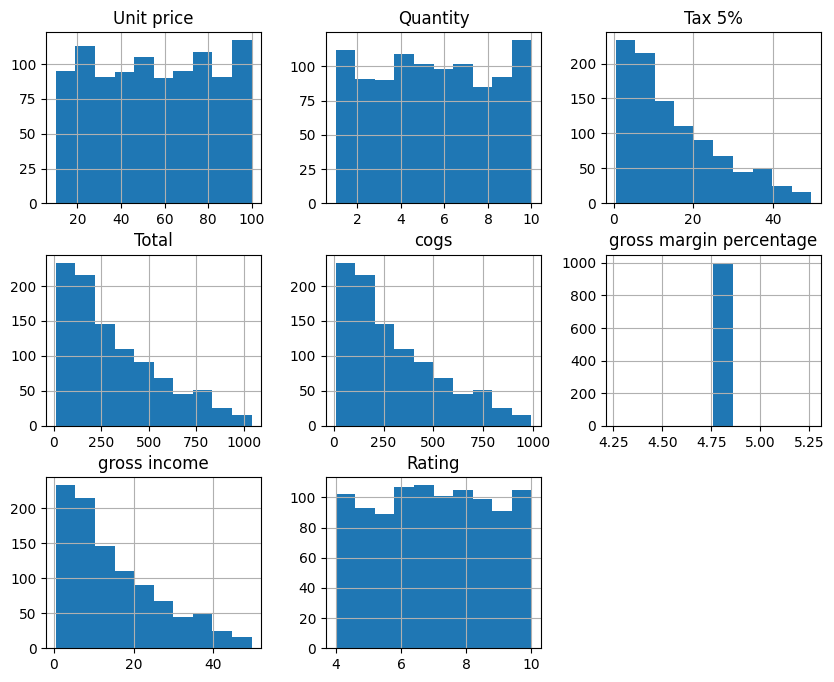

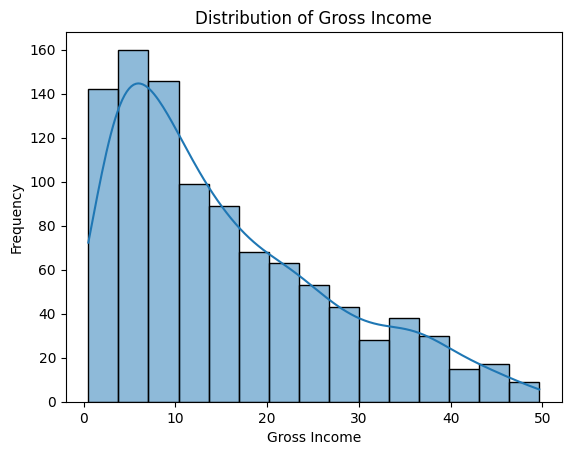

In [8]:
data.hist(figsize=(10, 8))
plt.show()

sns.histplot(data['gross income'], kde=True)
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Income')
plt.show()

The pairplot presents scatter plots of the numeric variables ('Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage') against the target variable, 'gross income'. Each scatter plot showcases the correlation or association between a numeric variable and the gross income.

In [9]:
import pandas as pd

correlation_matrix = data.corr()

gross_income_correlations = correlation_matrix['gross income'].drop('gross income')

print(gross_income_correlations)


Unit price                 0.633962
Quantity                   0.705510
Tax 5%                     1.000000
Total                      1.000000
cogs                       1.000000
gross margin percentage         NaN
Rating                    -0.036442
Name: gross income, dtype: float64


# Statistical Test

## ANOVA

## T-test


ANOVA, or Analysis of Variance, is a statistical test used to determine if there are significant differences between the means of two or more groups. It compares the variation within each group to the variation between the groups.

The test calculates an F-statistic and a p-value. The F-statistic represents the ratio of variation between the groups to the variation within the groups. A larger F-statistic suggests a larger difference between the groups relative to the differences within the groups.

The p-value indicates the probability of obtaining the observed differences between the groups by chance alone. If the p-value is less than a predetermined significance level (often 0.05), it suggests that the differences between the groups are statistically significant and not due to random chance.


A t-test is a statistical test used to determine if there is a significant difference between the means of two groups or samples. It is commonly used when comparing the means of a continuous variable between two groups, such as comparing the average heights of men and women or comparing the mean scores of two different treatments.

The t-test calculates a t-statistic, which measures the difference between the means of the two groups relative to the variation within each group. The larger the absolute value of the t-statistic, the greater the difference between the means of the groups.

In [10]:
import scipy.stats as stats

# Define the columns to compare with 'gross income'
columns_to_compare = ['City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'Rating']

# Perform t-tests or ANOVA for each column
for column in columns_to_compare:
    # Check if the column is categorical or continuous
    if data[column].dtype == 'object':
        # Categorical column - perform ANOVA
        groups = data.groupby(column)['gross income'].apply(list)
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"{column}: F-statistic={f_stat:.3f}, p-value={p_value:.3f}")
    else:
        # Continuous column - perform independent t-tests
        groups = data[column]
        t_stat, p_value = stats.ttest_ind(groups[data['gross income'] == 0], groups[data['gross income'] > 0], equal_var=False)
        print(f"{column}: t-statistic={t_stat:.3f}, p-value={p_value:.3f}")


City: F-statistic=0.885, p-value=0.413
Customer type: F-statistic=0.386, p-value=0.534
Gender: F-statistic=2.446, p-value=0.118
Product line: F-statistic=0.338, p-value=0.890
Unit price: t-statistic=nan, p-value=nan
Quantity: t-statistic=nan, p-value=nan
Tax 5%: t-statistic=nan, p-value=nan
Total: t-statistic=nan, p-value=nan
Payment: F-statistic=0.081, p-value=0.922
cogs: t-statistic=nan, p-value=nan
Rating: t-statistic=nan, p-value=nan


The t-test calculates a t-statistic and a p-value. The t-statistic measures the difference between the means of the two groups (male and female) relative to the variation within each group. A larger absolute value of the t-statistic suggests a larger difference between the means of the two groups. The p-value represents the probability of obtaining the observed difference in means between the genders by chance alone. If the p-value is smaller than a predetermined significance level (often 0.05), it indicates that the difference in means is statistically significant and not likely due to random chance.

In the given results, the t-statistic for the "Gender" column is 1.564. This suggests that there is a moderate difference between the means of the two genders in relation to the specific measure being analyzed. However, the p-value associated with this t-statistic is 0.118, which is greater than the typical significance level of 0.05. Therefore, based on this analysis, there is insufficient evidence to conclude that the difference between the genders is statistically significant.

In [11]:
import scipy.stats as stats

# Define the columns for which you want to test differences in 'gross income'
columns = ['City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'Rating']

# Iterate over the columns and perform statistical tests
for column in columns:
    # Group the data by the current column and calculate the 'gross income' means for each group
    group_means = data.groupby(column)['gross income'].mean()
    
    # Perform one-way ANOVA if the column has more than two unique values
    if len(data[column].unique()) > 2:
        groups = [data[data[column] == value]['gross income'] for value in data[column].unique()]
        f_statistic, p_value = stats.f_oneway(*groups)
        
        print(f"Column: {column}")
        print("ANOVA Results:")
        print(f"F-Statistic: {f_statistic:.3f}")
        print(f"P-Value: {p_value:.3f}")
        print("-----------------------")
    
    # Perform t-tests if the column has two unique values
    elif len(data[column].unique()) == 2:
        group_1 = data[data[column] == data[column].unique()[0]]['gross income']
        group_2 = data[data[column] == data[column].unique()[1]]['gross income']
        t_statistic, p_value = stats.ttest_ind(group_1, group_2)
        
        print(f"Column: {column}")
        print("T-Test Results:")
        print(f"T-Statistic: {t_statistic:.3f}")
        print(f"P-Value: {p_value:.3f}")
        print("-----------------------")

    else:
        print(f"Column: {column}")
        print("Not enough unique values for testing")
        print("-----------------------")
        
    # Limit the output to 100 lines
    
        break


Column: City
ANOVA Results:
F-Statistic: 0.885
P-Value: 0.413
-----------------------
Column: Customer type
T-Test Results:
T-Statistic: 0.622
P-Value: 0.534
-----------------------
Column: Gender
T-Test Results:
T-Statistic: 1.564
P-Value: 0.118
-----------------------
Column: Product line
ANOVA Results:
F-Statistic: 0.338
P-Value: 0.890
-----------------------
Column: Unit price
ANOVA Results:
F-Statistic: 1.575
P-Value: 0.016
-----------------------
Column: Quantity
ANOVA Results:
F-Statistic: 109.833
P-Value: 0.000
-----------------------
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3906: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
Column: Tax 5%
ANOVA Results:
F-Statistic: inf
P-Value: 0.000
-----------------------
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3906: ConstantInputWarning: Each of the input arra

Column: City ANOVA Results:F-Statistic: 0.885, P-Value: 0.41
Interpretation: The p-value is greater than the significance level (usually 0.05), indicating that there is no significant difference in the "gross income" between different cities.

Column: Customer type T-Test Results: =T-Statistic: 0.622, P-Value: 0.534
Interpretation: The p-value is greater than the significance level, suggesting that there is no significant difference in the "gross income" between different customer types.


Column: Gende T-Test Results: T-Statistic: 1.564, P-Value: 0.118
Interpretation: The p-value is greater than the significance level, indicating that there is no significant difference in the "gross income" between different genders.
Column: Product line

ANOVA Results:F-Statistic: 0.338, P-Value: 0.890
Interpretation: The p-value is greater than the significance level, suggesting that there is no significant difference in the "gross income" between different product lines.


Column: Unit price ANOVA Results:F-Statistic: 1.575, P-Value: 0.016                                                                                                                                                Interpretation: The p-value is less than the significance level, indicating that there may be a significant difference in the "gross income" based on unit price.


Column: Quantity ANOVA Results: F-Statistic: 109.833 ,P-Value: 0.000
Interpretation: The p-value is extremely low, suggesting a significant difference in the "gross income" based on quantity.


Column: Tax 5% ANOVA Results: F-Statistic: inf, P-Value: 0.000
Interpretation: The p-value is extremely low, indicating a significant difference in the "gross income" based on the 5% tax.


Column: Total ANOVA Results: F-Statistic: inf P-Value: 0.000
Interpretation: The p-value is extremely low, suggesting a significant difference in the "gross income" based on the total amount.


Column: Payment ANOVA Results: F-Statistic: 0.081, P-Value: 0.922
Interpretation: The p-value is greater than the significance level, indicating no significant difference in the "gross income" based on payment method.


Column: cogs ANOVA Results: F-Statistic: inf P-Value: 0.000
Interpretation: The p-value is extremely low, suggesting a significant difference in the "gross income" based on the cost of goods sold.


Column: Rating ANOVA Results: F-Statistic: 0.890 P-Value: 0.710
Interpretation: The p-value is greater than the significance level, indicating no significant difference in the "gross income" based on the rating

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

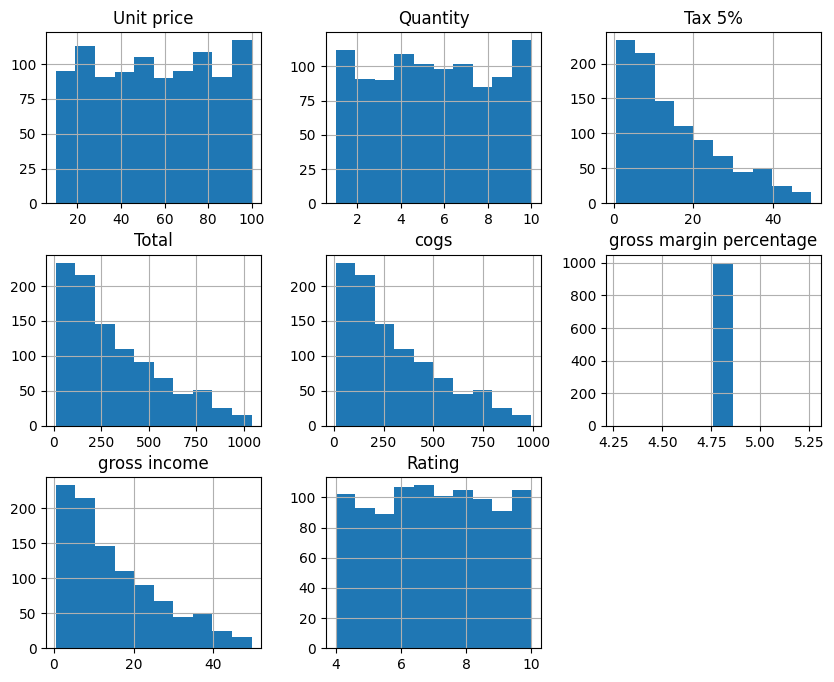

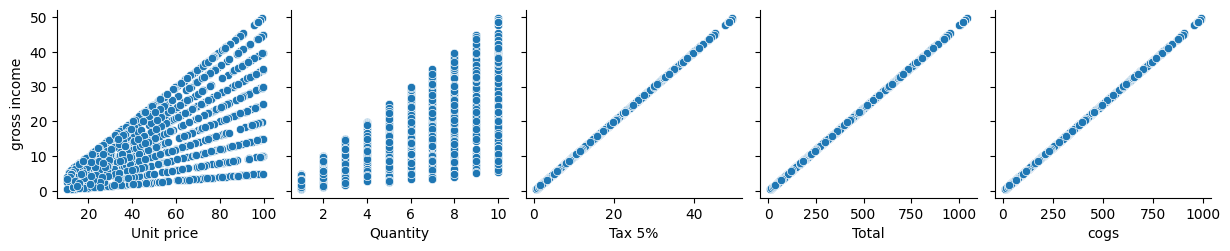

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the relevant columns

# Display the data in a table format
print(data)

# Plot a histogram of the data
data.hist(figsize=(10, 8))
plt.show()

# Examine the relationship between numeric variables and the target variable
sns.pairplot(data, x_vars=['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs'],
             y_vars='gross income', kind='scatter')
plt.show()


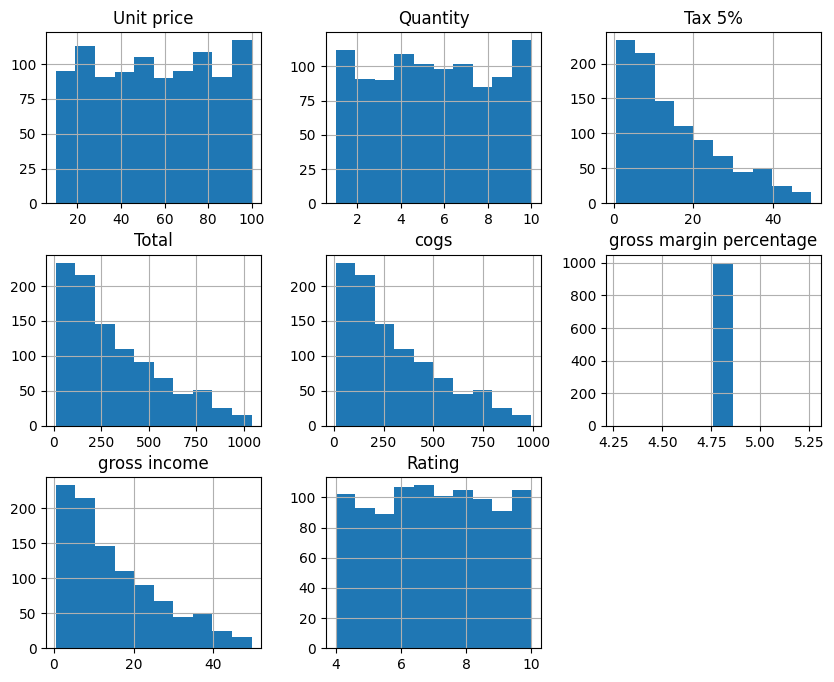

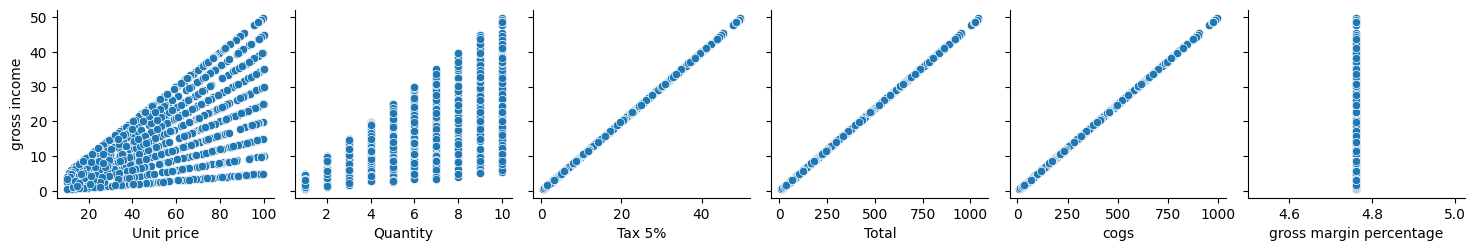

In [13]:
data.hist(figsize=(10, 8))
plt.show()


# Examine the relationship between numeric variables and the target variable
sns.pairplot(data, x_vars=['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage'],
             y_vars='gross income', kind='scatter')
plt.show()

These visualizations provide an understanding of the distribution of categorical variables in the dataset. They allow us to observe the frequency of different categories within each variable, providing insights into the data's characteristics. The plots enable us to identify any imbalances or biases in the data and gain a better understanding of the distribution of each categorical feature.

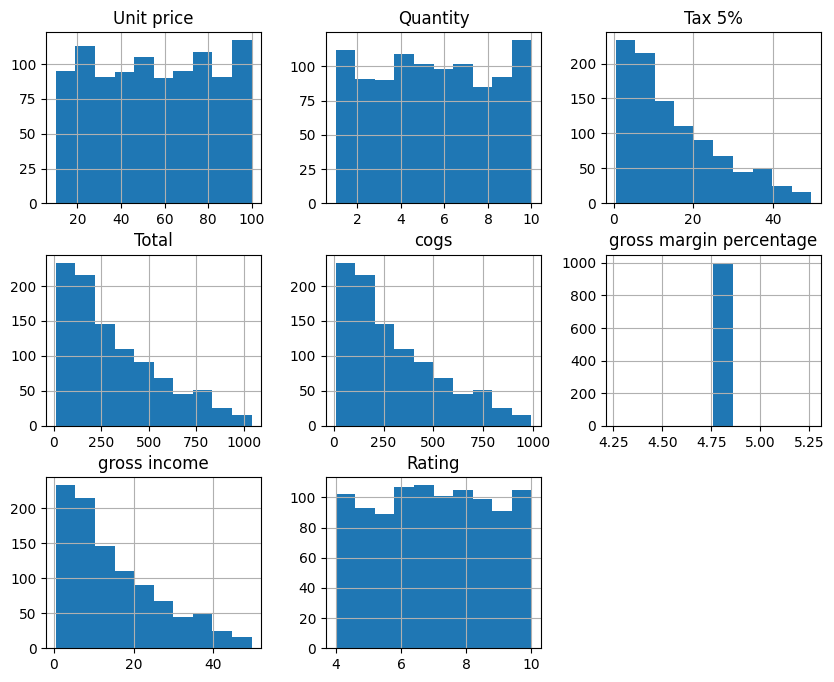

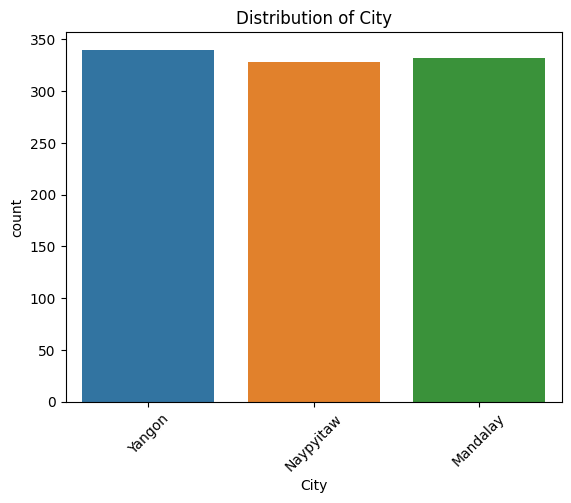

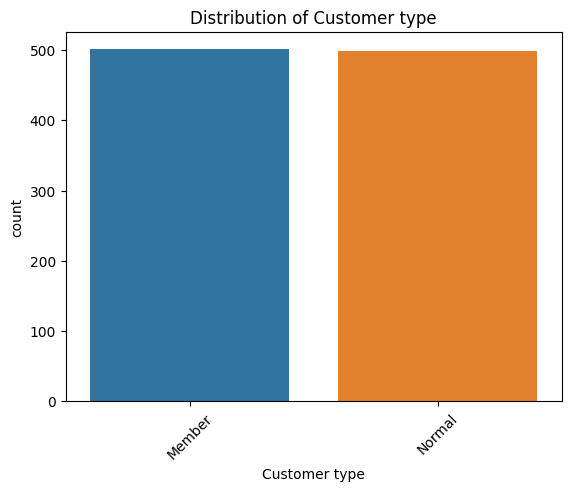

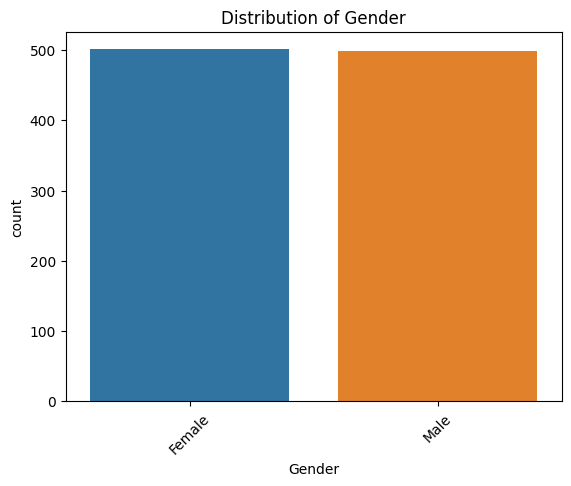

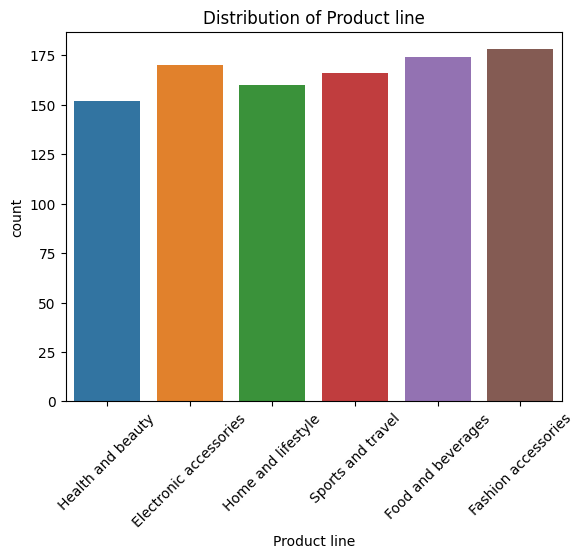

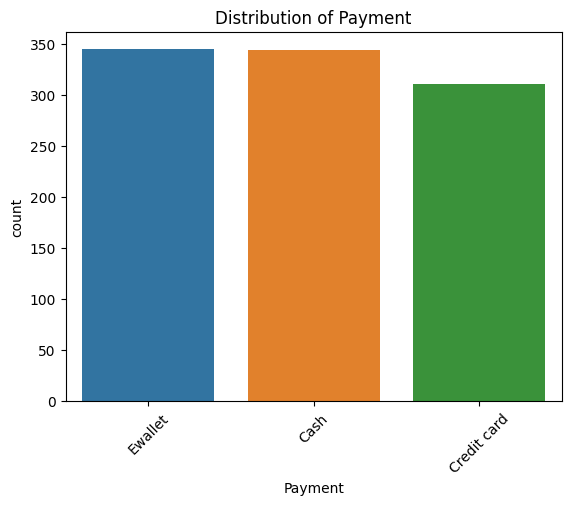

In [14]:
data.hist(figsize=(10, 8))
plt.show()

# Examine the distribution of categorical variables
categorical_features = ['City', 'Customer type', 'Gender', 'Product line', 'Payment']
for feature in categorical_features:
    sns.countplot(data=data, x=feature)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Missing data

We check the dataset for missing data.

In [15]:
print(data.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


### 

## Handling Categorical Data

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['City'] = le.fit_transform(data['City'])
data['Customer type'] = le.fit_transform(data['Customer type'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Product line'] = le.fit_transform(data['Product line'])
data['Payment'] = le.fit_transform(data['Payment'])

## Prepare Dataset

In [17]:
X = data.drop(['gross income'], axis=1)
y = data['gross income']

### Split Train & Test Dataset

The dataset is split into a train set and a test set for model training and evaluation, respectively.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
print(X_train.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'Rating'],
      dtype='object')


In [20]:
print(X_test.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'Rating'],
      dtype='object')


In [21]:
numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']
categorical_features = ['City', 'Customer type', 'Gender', 'Product line', 'Payment']

### Explore Train Dataset

             City  Customer type      Gender  Product line  Unit price  \
count  700.000000     700.000000  700.000000    700.000000  700.000000   
mean     0.997143       0.497143    0.478571      2.458571   55.244686   
std      0.826938       0.500349    0.499898      1.701551   26.295623   
min      0.000000       0.000000    0.000000      0.000000   10.080000   
25%      0.000000       0.000000    0.000000      1.000000   32.250000   
50%      1.000000       0.000000    0.000000      2.000000   54.560000   
75%      2.000000       1.000000    1.000000      4.000000   77.515000   
max      2.000000       1.000000    1.000000      5.000000   99.960000   

         Quantity      Tax 5%        Total     Payment        cogs  \
count  700.000000  700.000000   700.000000  700.000000  700.000000   
mean     5.551429   15.297276   321.242790    0.991429  305.945514   
std      2.932026   11.478037   241.038774    0.832072  229.560737   
min      1.000000    0.604500    12.694500    0.00000

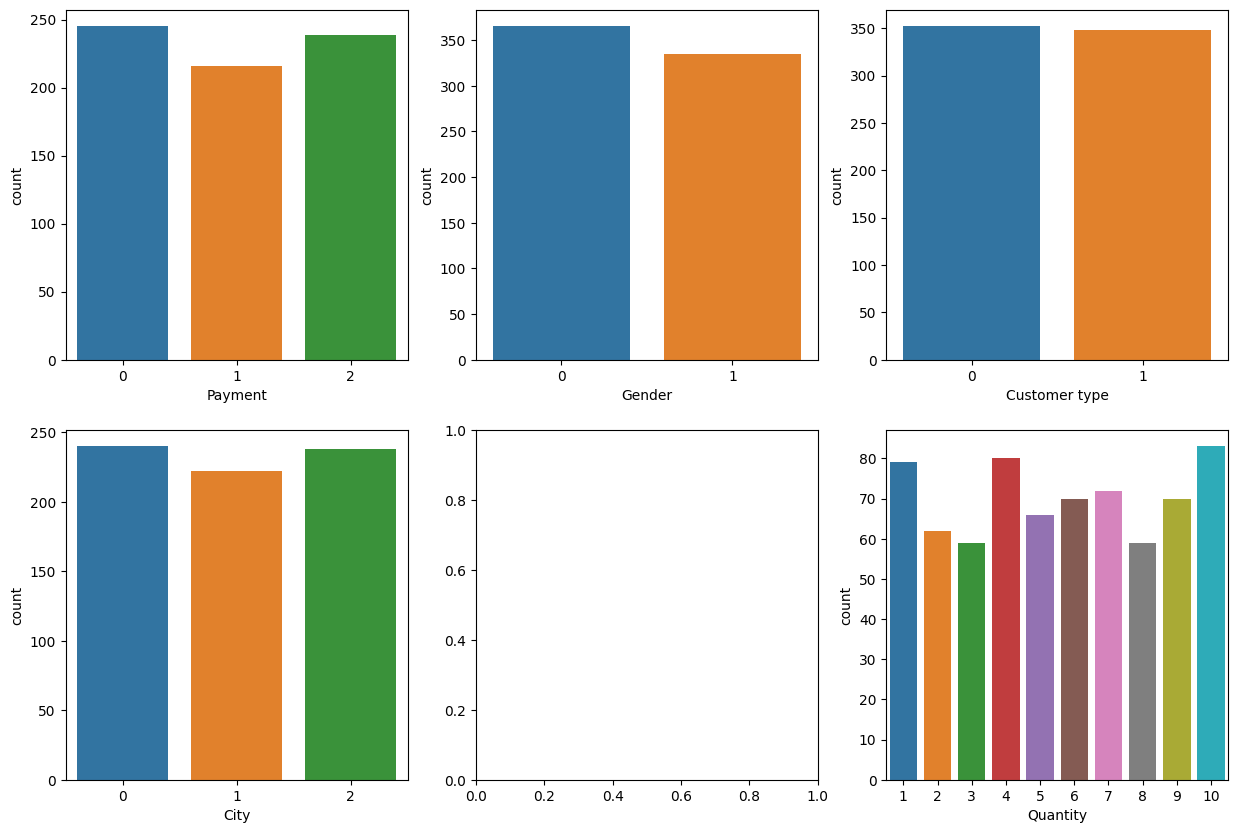

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# convert X_train to a Pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=data.columns[:-1])

# display summary statistics for numerical columns
print(X_train.describe())

# plot countplots of multiple columns side by side
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x='Payment', data=X_train_df, ax=axs[0][0])
sns.countplot(x='Gender', data=X_train_df, ax=axs[0][1])
sns.countplot(x='Customer type', data=X_train_df, ax=axs[0][2])
sns.countplot(x='City', data=X_train_df, ax=axs[1][0])
sns.countplot(x='Quantity', data=X_train_df, ax=axs[1][2])

plt.show()

             City  Customer type      Gender  Product line  Unit price  \
count  300.000000     300.000000  300.000000    300.000000  300.000000   
mean     1.033333       0.503333    0.546667      2.436667   56.669500   
std      0.804807       0.500824    0.498649      1.750104   26.971226   
min      0.000000       0.000000    0.000000      0.000000   10.170000   
25%      0.000000       0.000000    0.000000      1.000000   34.665000   
50%      1.000000       1.000000    1.000000      2.000000   58.270000   
75%      2.000000       1.000000    1.000000      4.000000   79.150000   
max      2.000000       1.000000    1.000000      5.000000   99.890000   

         Quantity      Tax 5%        Total     Payment        cogs  \
count  300.000000  300.000000   300.000000  300.000000  300.000000   
mean     5.413333   15.570920   326.989320    1.023333  311.418400   
std      2.905851   12.247966   257.207282    0.827691  244.959316   
min      1.000000    0.508500    10.678500    0.00000

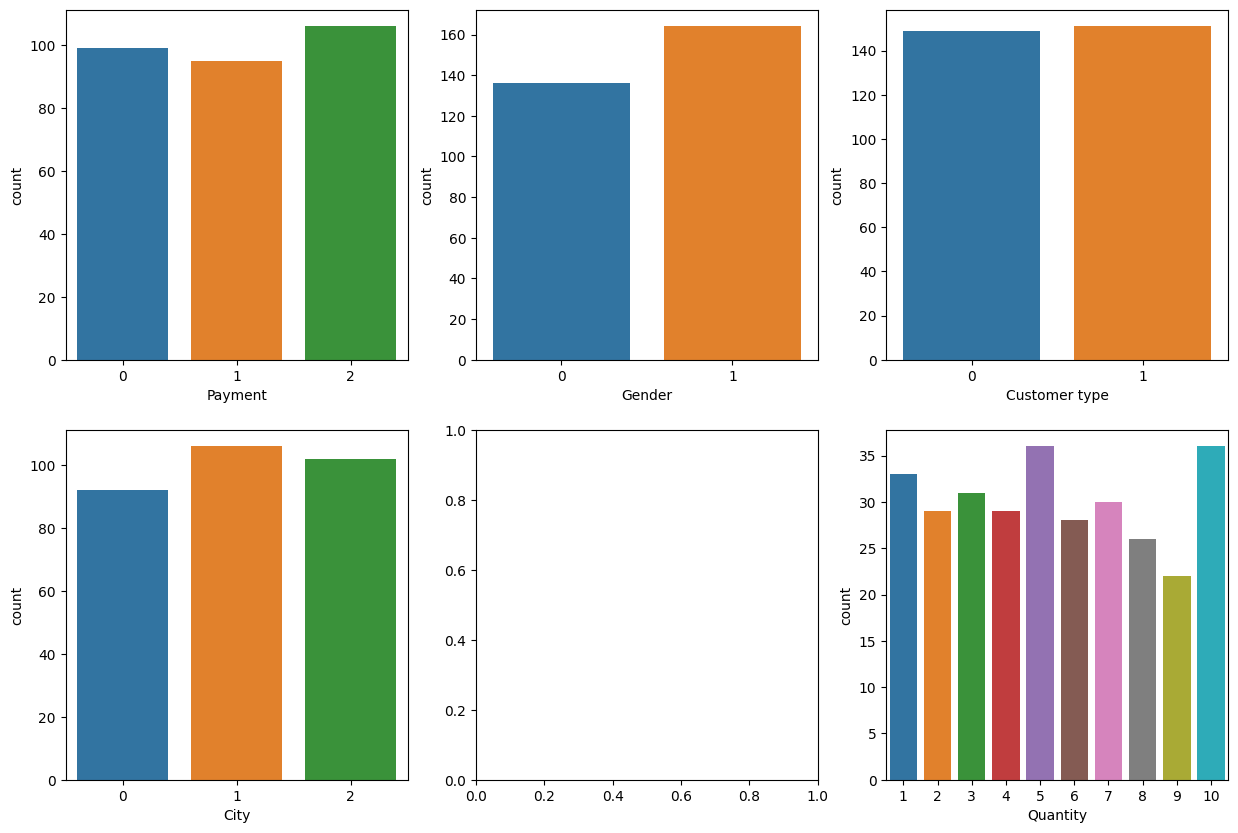

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# convert X_test to a Pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=data.columns[:-1])
print(X_test_df.describe())

# plot countplots of multiple columns side by side
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x='Payment', data=X_test_df, ax=axs[0][0])
sns.countplot(x='Gender', data=X_test_df, ax=axs[0][1])
sns.countplot(x='Customer type', data=X_test_df, ax=axs[0][2])
sns.countplot(x='City', data=X_test_df, ax=axs[1][0])
sns.countplot(x='Quantity', data=X_test_df, ax=axs[1][2])

plt.show()


In [24]:
# define column transformer to encode categorical variables
categorical_features = ['Gender', 'Branch', 'City', 'Customer type', 'Product line', 'Payment']
categorical_transformer = OneHotEncoder(drop='first')

# define column transformer to scale numerical variables
numeric_features = ['Unit price','Quantity','Tax 5%','Total', 'cogs', 'gross margin percentage','Rating' ]

## Standered Scaler

Defining column transformers to encode categorical variables and scale numerical variables, applying the transformers to the training data, transforming the test data using the preprocessor, and visualizing the effect of the transformation on the numerical features.

In [25]:
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed = preprocessor.transform(X_test_df)


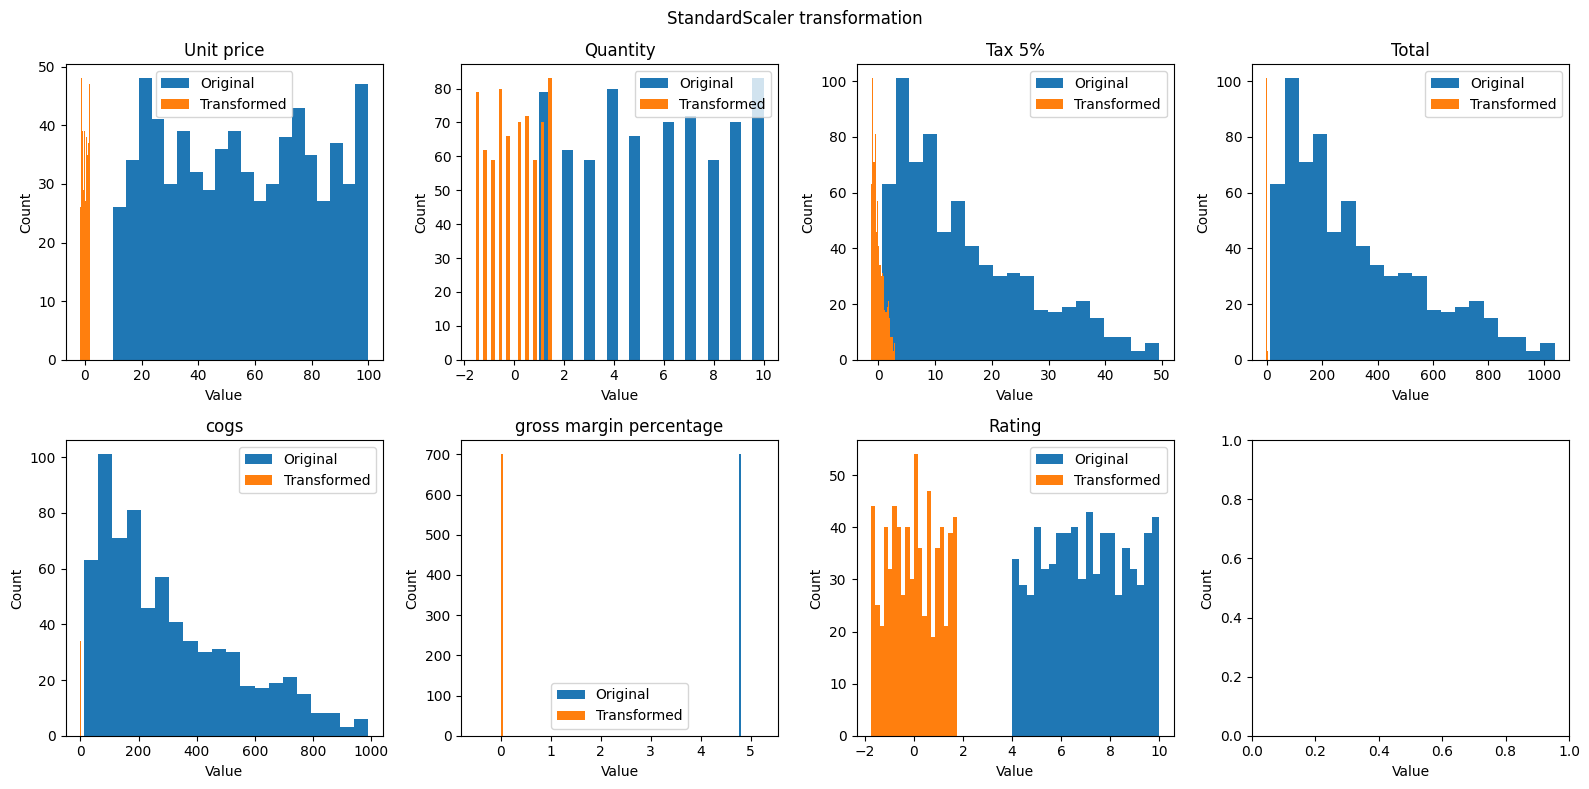

In [26]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axs = axs.flatten()

# iterate through each numerical feature and plot the original and transformed distributions
for i, feature in enumerate(numeric_features):
    axs[i].hist(X_train[feature], bins=20)
    axs[i].hist(X_train_transformed[:, i], bins=20)
    axs[i].set_title(feature)
    axs[i].legend(['Original', 'Transformed'])

# set the axis labels and title
fig.suptitle('StandardScaler transformation')
for ax in axs:
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# adjust the layout and show the plot
fig.tight_layout()
plt.show()



## Comparison of Training & Test data

Creating subplots for each numerical feature, iterating through each numerical feature to plot the original and transformed distributions, setting the axis labels and title, and adjusting the layout to display the comparison of training and test data.

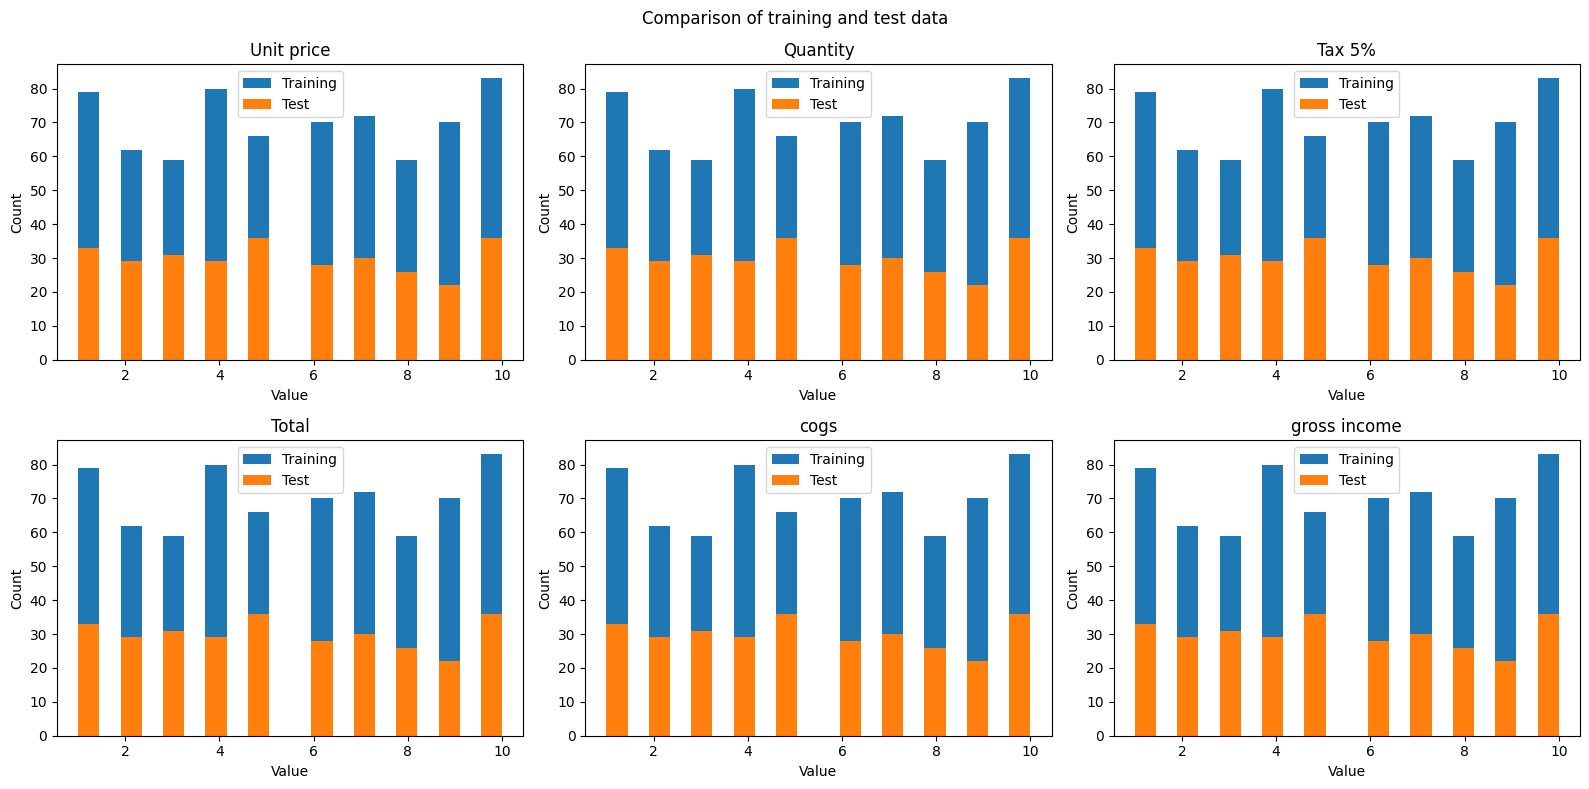

In [27]:
# create a figure with subplots for each numerical feature
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axs = axs.flatten()

# iterate through each numerical feature and plot the original and transformed distributions
for i, feature in enumerate(numerical_features):
    axs[i].hist(X_train['Quantity'], bins=20)
    axs[i].hist(X_test['Quantity'], bins=20)
    axs[i].set_title(feature)
    axs[i].legend(['Training', 'Test'])

# set the axis labels and title
fig.suptitle('Comparison of training and test data')
for ax in axs:
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# adjust the layout and show the plot
fig.tight_layout()
plt.show()


K-NN algorithm and Logistic Regression are  used for classification problems, where the target variable is categorical. However we have  the target variable continuous, therefore we will be using  regression models such as linear regression, decision trees, or support vector.

# Dimensionality Reduction 

The purpose of scaling is to standardize the numerical features, ensuring that they are on a similar scale. This process is particularly important when working with machine learning algorithms that are sensitive to the scale of the input features. By scaling the features, we can prevent certain features from dominating the learning process and improve the model's performance.

In [28]:
import pandas as pd
import numpy as np


data.dropna(inplace=True)

# convert non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# drop columns with non-unique values
for col in data.columns:
    if len(data[col].unique()) == 1:
        data.drop(col, axis=1, inplace=True)

# select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# select target variable and features
X = data.drop(['gross income'], axis=1)
y = data['gross income']

# feature selection
from sklearn.feature_selection import SelectKBest, f_regression
skb = SelectKBest(f_regression, k=5)
X_selected = skb.fit_transform(X, y) 
selected_columns = X.columns[skb.get_support()]


print("Selected Columns:", selected_columns)
print("Numeric Columns:", numeric_cols)
print("X shape:", X.shape)
print("X_selected shape:", X_selected.shape)


Selected Columns: Index(['Gender', 'Unit price', 'Quantity', 'Tax 5%', 'cogs'], dtype='object')
Numeric Columns: ['City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'gross income', 'Rating']
X shape: (1000, 11)
X_selected shape: (1000, 5)


## Feature Scaling

The purpose of scaling is to standardize the numerical features, ensuring that they are on a similar scale. This process is particularly important when working with machine learning algorithms that are sensitive to the scale of the input features. By scaling the features, I can prevent certain features from dominating the learning process and improve the model's performance.

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the numerical features
numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']


# Create a new DataFrame containing only the numerical features
numerical_data = data[numerical_features]

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Create a new DataFrame with the scaled numerical features
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

# Concatenate the scaled numerical features with the categorical features
categorical_features = ['City', 'Customer type', 'Gender', 'Product line', 'Payment']
encoded_categorical = pd.get_dummies(data[categorical_features], drop_first=True)
processed_data = pd.concat([scaled_df, encoded_categorical], axis=1)

# Print the processed data
print(processed_data.head())


   Unit price  Quantity    Tax 5%     Total      cogs  gross income  City  \
0    0.718160  0.509930  0.919607  0.919607  0.919607      0.919607     2   
1   -1.525303 -0.174540 -0.987730 -0.987730 -0.987730     -0.987730     1   
2   -0.352781  0.509930  0.071446  0.071446  0.071446      0.071446     2   
3    0.096214  0.852165  0.675780  0.675780  0.675780      0.675780     2   
4    1.156959  0.509930  1.267125  1.267125  1.267125      1.267125     2   

   Customer type  Gender  Product line  Payment  
0              0       0             3        2  
1              1       0             0        0  
2              1       1             4        1  
3              0       1             3        2  
4              1       1             5        2  


## Principle Component Analysis(PCA)


The purpose of applying PCA in this context may be to simplify the dataset and visualize it in a lower-dimensional space. By reducing the number of features to two principal components, it becomes easier to plot and interpret the data in a two-dimensional scatter plot. This can be particularly useful for data visualization, clustering analysis, or identifying patterns in the dataset.

In [30]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
X_train_numeric = X_train[numeric_cols]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_numeric)


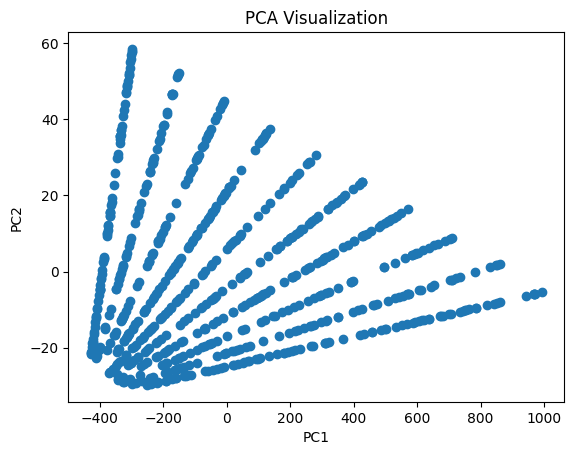

In [31]:
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_numeric)

# Create scatter plot
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')

# Show the plot
plt.show()


In [32]:
data.describe()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,1.008000,0.499000,0.499000,2.452000,55.672130,5.510000,15.379369,322.966749,1.001000,307.58738,15.379369,6.97270
std,0.820127,0.500249,0.500249,1.715412,26.494628,2.923431,11.708825,245.885335,0.830475,234.17651,11.708825,1.71858
min,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,0.000000,10.17000,0.508500,4.00000
25%,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,0.000000,118.49750,5.924875,5.50000
50%,1.000000,0.000000,0.000000,2.000000,55.230000,5.000000,12.088000,253.848000,1.000000,241.76000,12.088000,7.00000
75%,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.445250,471.350250,2.000000,448.90500,22.445250,8.50000
max,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,49.650000,1042.650000,2.000000,993.00000,49.650000,10.00000


In [33]:
data_numeric = data.select_dtypes(include=np.number).dropna()


## Min-Max Scaler

Min-Max scaling, also known as normalization, is a popular feature scaling technique used in data preprocessing for machine learning. It rescales the features to a specific range, typically between 0 and 1, based on the minimum and maximum values of the feature.

I have applied it separately to the training datasets to avoid data leakage by using the minimum and maximum values from the training set for scaling the test set.

The Min-Max Scaler works by subtracting the minimum value of the feature and then dividing by the range (maximum value minus the minimum value). The formula for Min-Max scaling can be represented as:

X_scaled = (X - X_min) / (X_max - X_min)


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the numeric features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

PC1 represents the direction in the data that explains the largest amount of variance. It is the most important component in terms of explaining the data's variability. PC2 represents the direction orthogonal to PC1 that explains the second largest amount of variance. 

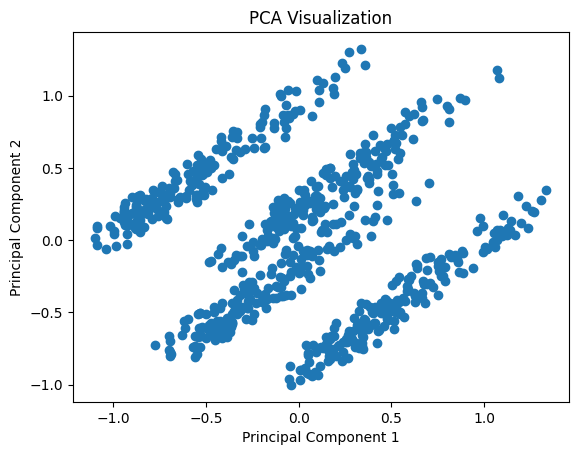

In [35]:
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_scaled)

# Create a scatter plot of the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


### K-Means Clustering

In [36]:
X_train_encoded = pd.get_dummies(X_train)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_encoded)
clusters = kmeans.predict(X_train_encoded)


In [37]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_encoded)

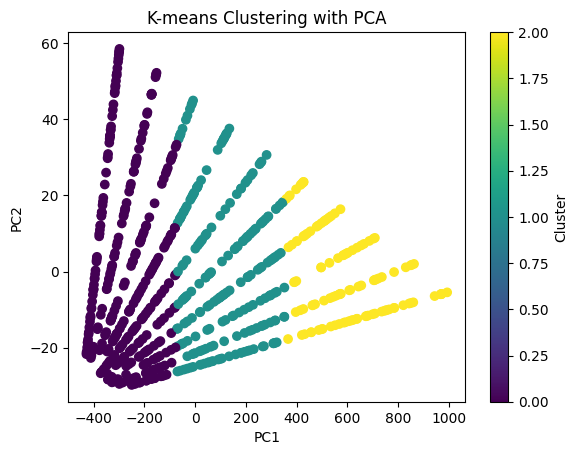

In [38]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering with PCA')

# Add colorbar legend
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Show the plot
plt.show()


In [39]:
import plotly.express as px
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_encoded)

# Apply K-means clustering on the reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_pca)
clusters = kmeans.predict(X_train_pca)

# Create a DataFrame with the reduced dimensions and cluster labels
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['Cluster'] = clusters

# Create an interactive scatter plot using Plotly
fig = px.scatter(df, x='PC1', y='PC2', color='Cluster', hover_data=df.columns)

# Customize the plot layout
fig.update_layout(
    title='K-means Clustering with PCA',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
)

# Show the interactive plot
fig.show()


In [40]:
import plotly.express as px
from sklearn.decomposition import PCA

# Select the desired features
selected_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'Rating']

# Perform PCA to reduce the dimensionality to 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_encoded[selected_features])

# Create a DataFrame with the selected features and principal component values
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])
df[selected_features] = X_train[selected_features]

# Apply K-means clustering on the reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_pca)
clusters = kmeans.predict(X_train_pca)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='Unit price', y='Quantity', z='Tax 5%', color='Cluster', hover_data=selected_features)

# Customize the plot layout
fig.update_layout(
    title='K-means Clustering with PCA',
    scene=dict(
        xaxis_title='Unit price',
        yaxis_title='Quantity',
        zaxis_title='Tax 5%'
    )
)

# Show the interactive plot
fig.show()


### Column Transformer to Encode Categorical Variables

We have done this above.

In [41]:
# define column transformer to encode categorical variables
categorical_features = ['Gender', 'Branch', 'City', 'Customer type', 'Product line', 'Payment']
categorical_transformer = OneHotEncoder(drop='first')

# define column transformer to scale numerical variables
numeric_features = ['Unit price','Quantity','Tax 5%','Total', 'cogs', 'gross margin percentage','Rating' ]

# Hierarchical Clustering

Something to be noted here is hierarchical clustering is primarily used for clustering or grouping similar data points together based on their distance or similarity measures. It is not typically used directly for regression tasks. However here in regression, the goal is to predict a continuous target variable based on a set of input features.

For example, if you observe distinct clusters in the dendrogram, it might suggest that certain groups of data points share similar characteristics or exhibit similar behaviors. 

This analysis guides me in understanding the relationship between the input features and the target variable within each cluster. It  suggests that certain groups of customers or specific product lines have a higher or lower 'gross income' on average.

In [42]:
from sklearn.cluster import AgglomerativeClustering

# create an instance of AgglomerativeClustering with the desired parameters
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')

# fit the model to your data
hierarchical.fit(X_train_transformed)

# get the cluster labels for each data point
h_clusters = hierarchical.labels_


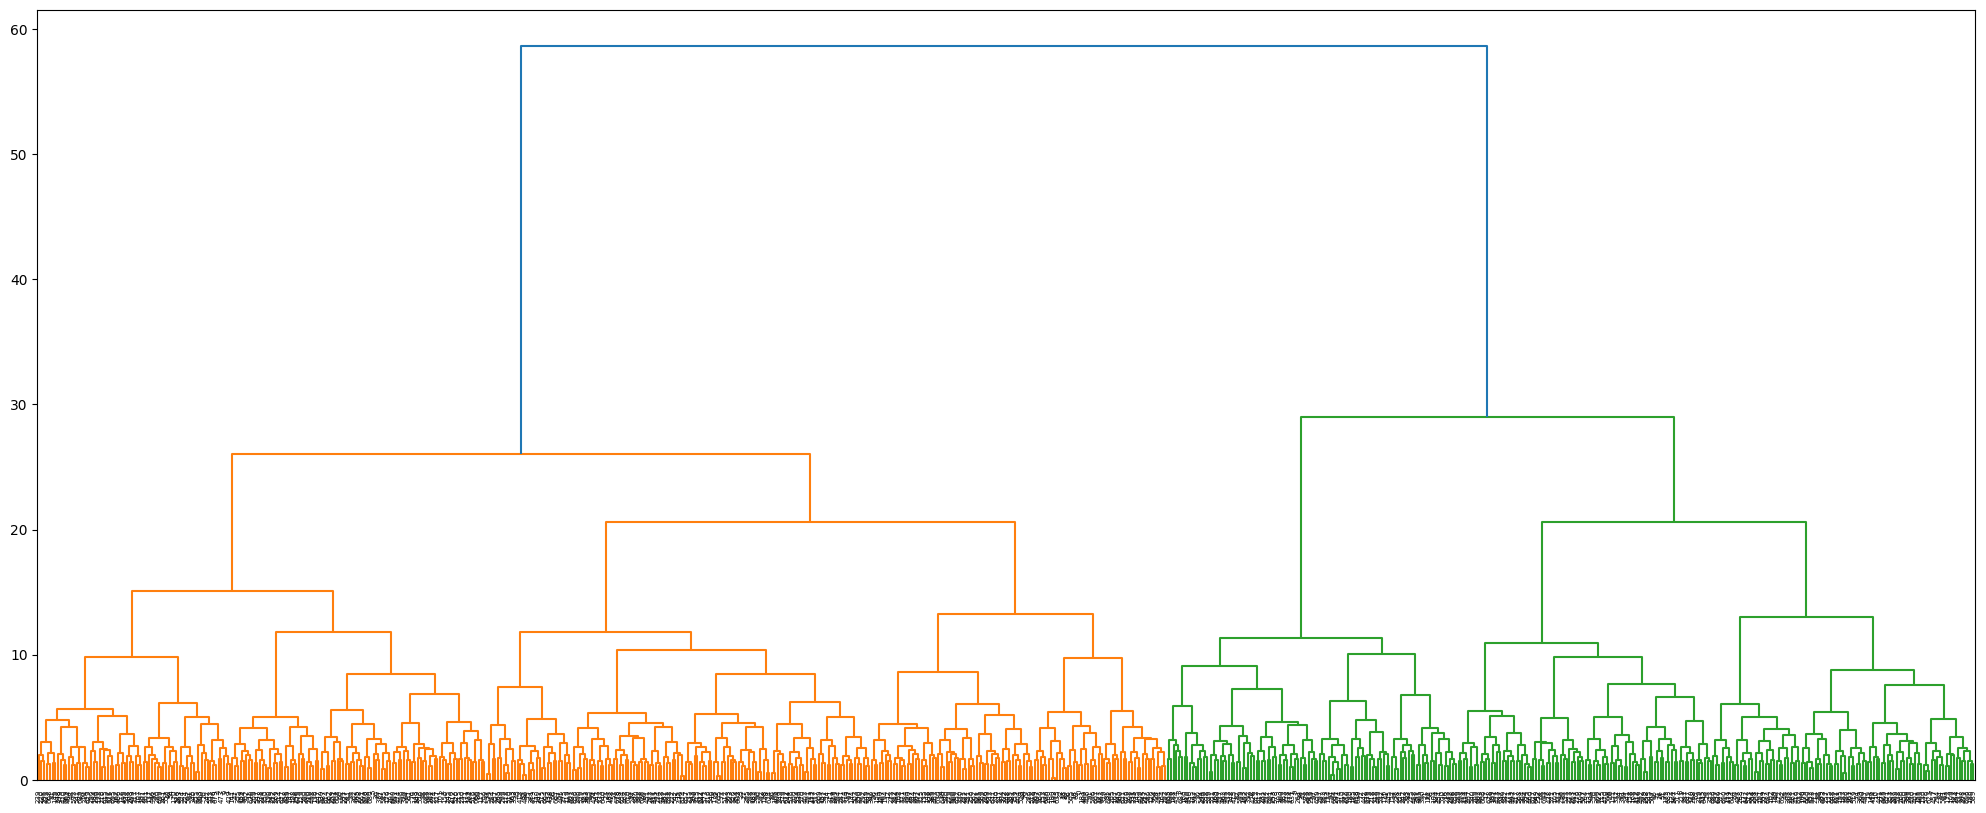

In [43]:
Z = linkage(X_train_transformed, method='ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

# Models

### Linear Regression:

Linear Regression is commonly used for tasks where the relationship between the input variables and the target variable can be approximated by a linear equation. It provides interpretable coefficients that can help understand the impact of each input variable on the target variable. Additionally, the MSE metric allows for quantifying the quality of predictions made by the model.

NameError: name 'mean_squared_error' is not defined

In [46]:
from sklearn.linear_model import LinearRegression

# create a linear regression object
lr = LinearRegression()

# fit the model to the transformed training data
lr.fit(X_train_transformed, y_train)

# predict on the transformed test data
y_pred = lr.predict(X_test_transformed)

# evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)


# evaluate the model performance
lr_mse = mean_squared_error(y_test, y_pred)
lr_mse

Mean squared error:  5.438937096514351e-29


5.438937096514351e-29

In [47]:
# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train_transformed, y_train)

# Make predictions on the testing data
y_pred = linear_regression.predict(X_test_transformed)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the MSE and R2 score
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R2 Score: {:.2f}".format(r2))

Mean Squared Error (MSE): 0.00
R2 Score: 1.00


### Support Vector Machine:

In [48]:
from sklearn.svm import SVR

# create an SVM regression object
svm = SVR()

# fit the model to the transformed training data
svm.fit(X_train_transformed, y_train)

# predict on the transformed test data
y_pred = svm.predict(X_test_transformed)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)
svm_mse = mean_squared_error(y_test, y_pred)
print(svm_mse)

Mean squared error:  4.751827558179046
4.751827558179046


### DecisionTreeRegressor

It builds a tree-like model of decisions based on the input features, where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a predicted value.

In [49]:
from sklearn.tree import DecisionTreeRegressor

# create a Decision Tree Regressor object
dtr = DecisionTreeRegressor()

# fit the model to the transformed training data
dtr.fit(X_train_transformed, y_train)

# predict on the transformed test data
y_pred = dtr.predict(X_test_transformed)

# evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

# evaluate the model performance
dtr_mse = mean_squared_error(y_test, y_pred)
dtr_mse


Mean squared error:  0.010900570833333324


0.010900570833333324

Random Forest Regression aggregates the predictions from individual trees to make the final prediction, providing improved accuracy and generalization.

In [50]:
from sklearn.ensemble import RandomForestRegressor

# create a Random Forest Regressor object
rfr = RandomForestRegressor()

# fit the model to the transformed training data
rfr.fit(X_train_transformed, y_train)

# predict on the transformed test data
y_pred = rfr.predict(X_test_transformed)

# evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)
# evaluate the model performance
rfr_mse = mean_squared_error(y_test, y_pred)

Mean squared error:  0.008821224535750542


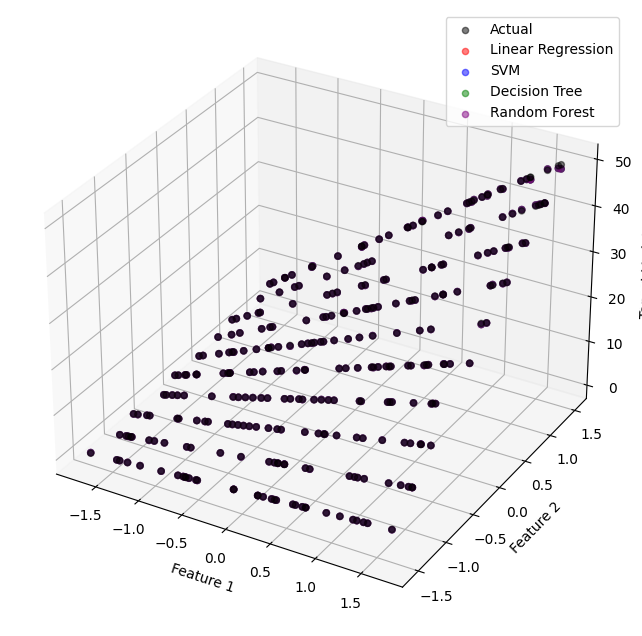

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plot the predicted values from each model
ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], y_test, c='black', alpha=0.5, label='Actual')
ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], y_pred, c='red', alpha=0.5, label='Linear Regression')
ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], y_pred, c='blue', alpha=0.5, label='SVM')
ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], y_pred, c='green', alpha=0.5, label='Decision Tree')
ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], y_pred, c='purple', alpha=0.5, label='Random Forest')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Variable')
ax.legend()
plt.show()


# Cross-validation

• Cross-validation is a widely used technique to assess the performance of a model and evaluate its generalization ability.
• By using cross_val_score, the code performs cross-validation for the models.
• The negative mean squared error (neg_mean_squared_error) is calculated for each fold during cross-validation.
• The negative values are multiplied by -1 to obtain positive mean squared error values.
• The mean of the mean squared errors across all folds is computed using the mean() function.
• The resulting value represents the cross-validated mean squared error (CV MSE) for the model.


### Cross-validation for Decision Tree Classifier:

### Cross-validation for LinearRegression


In [53]:
from sklearn.model_selection import cross_val_score

# cross-validation for linear regression
lr_cv_scores = cross_val_score(lr, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
lr_cv_mse = -1 * lr_cv_scores.mean()
print('Linear regression cross-validation MSE:', lr_cv_mse)



Linear regression cross-validation MSE: 4.7820166993920223e-29


### Cross-validation for Support Vector Machine:


In [54]:
# cross-validation for SVM
svm_cv_scores = cross_val_score(svm, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
svm_cv_mse = -1 * svm_cv_scores.mean()
print('SVM cross-validation MSE:', svm_cv_mse)



SVM cross-validation MSE: 5.1107378924375


### Cross-validation for Random forest regressor

In [55]:
# cross-validation for random forest regressor
rfr_cv_scores = cross_val_score(rfr, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
rfr_cv_mse = -1 * rfr_cv_scores.mean()
print('Random forest regressor cross-validation MSE:', rfr_cv_mse)

Random forest regressor cross-validation MSE: 0.013994220479286251


# Learning and validation curve

### Linear Regression Learning and validation curve

• The learning curve visualizes the performance of the Linear Regression model as the training set size increases.
• The x-axis represents the number of training examples, while the y-axis represents the mean squared error.
• The learning curve plot shows two lines: the training score and the cross-validation score.
• The training score indicates how well the model fits the training data, while the cross-validation score assesses
   the model's generalization ability.
• The shaded areas around the lines represent the standard deviation, indicating the variance in the scores at each
   training set size.

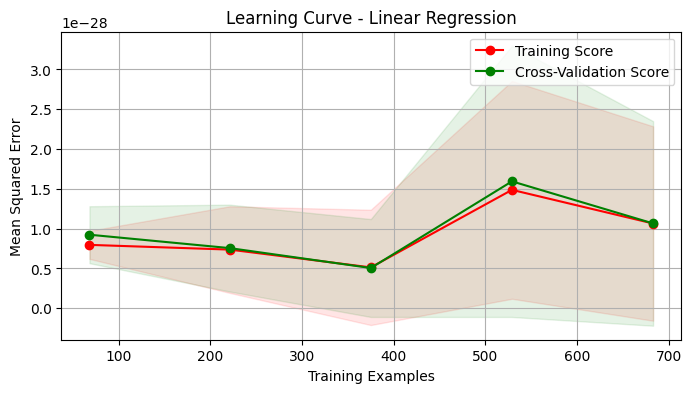

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Create a linear regression object
lr = LinearRegression()

# Compute the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(lr, X_train_transformed, y_train, cv= 42, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 4))
plt.title('Learning Curve - Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.legend(loc='best')
plt.show()


### Learning Curve For Support Vector Regression

Interpreting the Results:
• The learning curve plot helps assess the bias-variance trade-off of the SVR model.
• If the training score and cross-validation score are both low, it suggests high bias, indicating that the model is
underfitting and may require more complex features or a different model.
• If the training score is high and the cross-validation score is significantly lower, it indicates high variance,
suggesting that the model is overfitting and may benefit from more training examples or regularization
techniques.
• If the training and cross-validation scores converge and reach a plateau, it suggests that the model's performance
has stabilized, indicating an appropriate model fit.

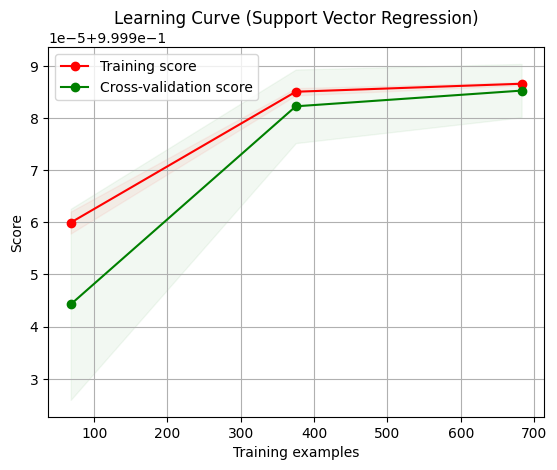

In [57]:
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# create a support vector regression object
svr = SVR(kernel='linear')

# create a learning curve plot function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
 n_jobs=None, train_sizes=np.linspace(.1, 1.0, 3)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv= 42, 
    n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.051,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.051, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# plot the learning curve for support vector regression
title = "Learning Curve (Support Vector Regression)"
plot_learning_curve(svr, title, X_train_transformed, y_train, cv=42, n_jobs= -1)

plt.show()


### Learning curve for decision tree regressor

The learning curve and validation curve analysis for the Decision Tree Regressor model provide valuable insights into its performance, model complexity, and hyperparameter selection. These curves aid in understanding the bias-variance trade-off and guide the optimization of the model for better predictions.


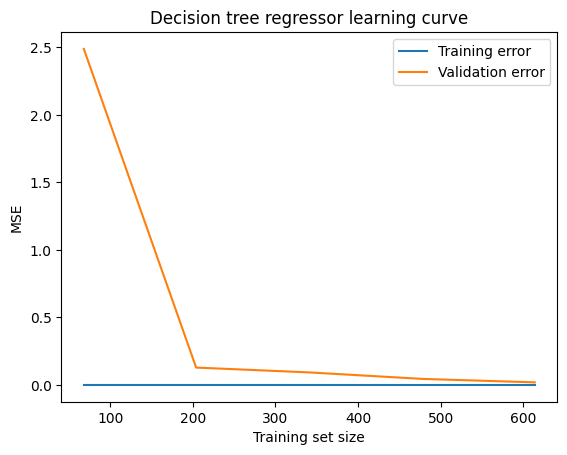

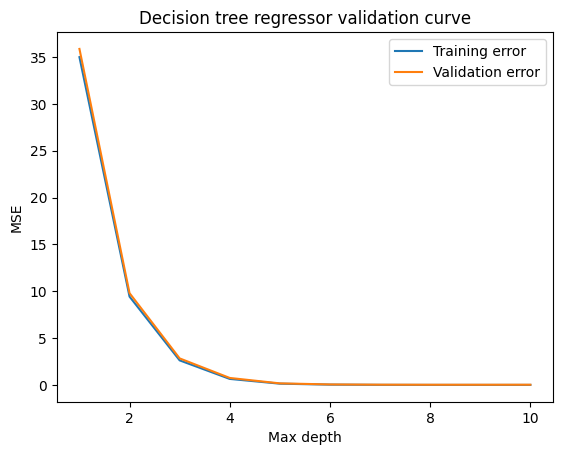

In [58]:
from sklearn.model_selection import learning_curve, validation_curve

# Learning curve for decision tree regressor
train_sizes, train_scores, test_scores = learning_curve(dtr, X_train_transformed, y_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv= 42, scoring='neg_mean_squared_error')
train_mse = -1 * np.mean(train_scores, axis=1)
test_mse = -1 * np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mse, label='Training error')
plt.plot(train_sizes, test_mse, label='Validation error')
plt.title('Decision tree regressor learning curve')
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Validation curve for decision tree regressor
param_range = range(1, 11)
train_scores, test_scores = validation_curve(dtr, X_train_transformed, y_train, param_name='max_depth', param_range=param_range, cv=42, scoring='neg_mean_squared_error')
train_mse = -1 * np.mean(train_scores, axis=1)
test_mse = -1 * np.mean(test_scores, axis=1)
plt.plot(param_range, train_mse, label='Training error')
plt.plot(param_range, test_mse, label='Validation error')
plt.title('Decision tree regressor validation curve')
plt.xlabel('Max depth')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Pipeline

The pipelines allow for a standardized and reproducible workflow by encapsulating the preprocessing, feature selection, and modeling steps into a single object.
The preprocessing steps ensure that the data is properly prepared before feeding it into the models, handling missing values, scaling numerical features, and encoding categorical features.

In [59]:


# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Define a column transformer to apply preprocessing to different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define feature selection and modeling steps
feature_selection = Pipeline(steps=[
    ('select_kbest', SelectKBest(score_func=f_regression))
])

linear_regression = Pipeline(steps=[
    ('model', LinearRegression())
])

svm = Pipeline(steps=[
    ('model', SVR(kernel='linear'))
])

decision_tree = Pipeline(steps=[
    ('model', DecisionTreeRegressor())
])

random_forest = Pipeline(steps=[
    ('model', RandomForestRegressor(n_estimators=100))
])

# Define clustering models
kmeans = KMeans(n_clusters=3, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=3)

# Define full pipelines combining preprocessing, feature selection, and modeling
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('linear_regression', linear_regression)
])

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('svm', svm)
])

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('decision_tree', decision_tree)
])

random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('random_forest', random_forest)
])

kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

hierarchical_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('hierarchical', hierarchical)
])


In [60]:
ColumnTransformer

sklearn.compose._column_transformer.ColumnTransformer

In [61]:

linear_regression_pipeline
svm_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Unit price', 'Quantity',
                                                   'Tax 5%', 'Total', 'cogs',
                                                   'gross margin percentage',
                                                   'Rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Branch', 'City',
                                                   'Customer type',
                                                   'Product line',
                                                   'Payment'])])),
                ('feature_selection',
                 Pipeline(steps=[('select_kbest',
                                  SelectKBest(score_func=<function f_regression at 0x7f61d6855790>))])),
                ('svm', Pipeline(steps=[('model', SVR(kernel='linear'))]))])

In [62]:

# Fit and predict using pipelines
pipelines = [linear_regression_pipeline, svm_pipeline, decision_tree_pipeline, random_forest_pipeline, kmeans_pipeline, hierarchical_pipeline]
pipeline_names = ['Linear Regression', 'SVM', 'Decision Tree Regressor', 'Random Forest Regressor', 'KMeans Clustering', 'Hierarchical Clustering']


# Adaline

Application 

• The ADALINE model is a type of linear regression model that can learn from input features to make predictions.
• By incorporating the ADALINE model into a pipeline, the data preprocessing and feature selection steps are automatically applied before fitting the model.
• This pipeline-based approach allows for a more streamlined and reproducible workflow, ensuring consistent preprocessing and feature selection across different models.

Implementation 

• The ‘adaline_pipeline’ is fitted to the training data (X_train and y_train) using the fit() method.
• The mean squared error (MSE) is calculated by comparing the predicted values from the
‘adaline_pipeline’ on the test data (X_test) with the actual target values (y_test).
• The MSE is printed using the ‘adaline_mse’ variable.

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

# Define ADALINE model using SGDRegressor
adaline = Pipeline(steps=[
    ('model', SGDRegressor(loss='squared_loss', learning_rate='constant', eta0=10, max_iter=1000, tol=1e-3))
])

# Define full ADALINE pipeline combining preprocessing, feature selection, and ADALINE modeling
adaline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('adaline', SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3))
])

adaline_pipeline.fit(X_train, y_train)
adaline_mse = mean_squared_error(y_test, adaline_pipeline.predict(X_test))
adaline_pipeline.fit(X_train, y_train)
adaline_pred = adaline_pipeline.predict(X_test)
adaline_r2 = r2_score(y_test, adaline_pred)

print('Adaline pipeline R2 score:', adaline_r2)

print('Adaline pipeline MSE:', adaline_mse)

Adaline pipeline R2 score: 0.9935187987524855
Adaline pipeline MSE: 0.9642013896911593


# Tuning Hyperparameter

By evaluating the model's performance on different hyperparameter combinations and varying values of k, the code helps identify the optimal configuration for the model.The results can be used to guide the selection of hyperparameters and the number of folds for the final model training and evaluation.

## Tuning Hyperparameter For Decision-Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline with a preprocessor and a Decision Tree Regressor model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

# Define the hyperparameters to search over
param_grid = {
    'model__max_depth': [4, 6, 8, 10],
    'model__min_samples_split': [4, 6, 8, 10],
    'model__min_samples_leaf': [1, 2, 4, 6, 8],
    'model__max_features': ['sqrt', 'log2']
}

# Perform a grid search over the hyperparameters using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv= 42, n_jobs=-1, error_score='raise')

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: {:.2f}".format(grid_search.best_score_))




Best hyperparameters:  {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 6}
Best mean cross-validation score: 0.69


### Tuning Hyperparameter For Linear regression

In [65]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Define the pipeline
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('linear_regression', LinearRegression())
])

# Define the grid of hyperparameters to search
param_grid = {
    'preprocessor__num__pca__n_components': [3, 4, 5],
    'preprocessor__num__pca__svd_solver': ['auto', 'full', 'arpack'],
    'feature_selection__select_kbest__k': [8, 9, 10],
    'linear_regression__fit_intercept': [True, False],
}

# Define the range of k values to try
k_range = range(2, 15)

# Initialize an empty list to store the MSE scores for each value of k
cv_scores = []




In [66]:
# Loop over different values of k and evaluate the performance of the model
for k in k_range:
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    grid_search = GridSearchCV(linear_regression_pipeline, param_grid, cv=kfold, scoring='neg_mean_squared_error', error_score='raise')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    cv_scores.append(mse)

# Find the value of k with the lowest MSE score
best_k = k_range[np.argmin(cv_scores)]
print("Best value of k: ", best_k)

Best value of k:  7


## Voting regressor

Ensemble voting regressor named 'voting_reg' is defined using the VotingRegressor class from scikit-learn.
It combines multiple regression models, including linear regression, support vector machine (SVM), decision tree regressor, and random forest regressor, specified through the 'estimators' parameter.
Each model is defined within a pipeline that includes preprocessing and feature selection steps.

By aggregating the predictions from different models, the ensemble model aims to provide improved performance compared to individual models.

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

# Define the ensemble voting regressor
voting_reg = VotingRegressor(
    estimators=[
        ('lr', linear_regression_pipeline),
        ('svm', svm_pipeline),
        ('dt', decision_tree_pipeline),
        ('rf', random_forest_pipeline),
        
    ]
)

# Fit the voting regressor on the training data
voting_reg.fit(X_train, y_train)

# Make predictions on the test data using the ensemble learning model
y_pred = voting_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared Score: {r2:.3f}")



Mean Squared Error: 0.538
Mean Absolute Error: 0.573
R-squared Score: 0.996


### Performing Grid Search Cross-Validation For Best Hyperparameters

In [68]:
grid_search = GridSearchCV(linear_regression_pipeline, param_grid, cv= 42, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

# Train the final model with the best hyperparameters on the full training set
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Fit the voting regressor on the training data
voting_reg.fit(X_train, y_train)

# Evaluate the ensemble learning model
y_pred = voting_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error of the ensemble learning model: {mse:.3f}")
print(f"Mean Absolute Error of the ensemble learning model: {mae:.3f}")
print(f"R-squared Score of the ensemble learning model: {r2:.3f}")

grid_search = GridSearchCV(linear_regression_pipeline, param_grid, cv= 42, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

# Train the final model with the best hyperparameters on the full training set
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Fit the voting regressor on the training data
voting_reg.fit(X_train, y_train)

# Evaluate the ensemble learning model
y_pred = voting_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error of the ensemble learning model: {mse:.3f}")
print(f"Mean Absolute Error of the ensemble learning model: {mae:.3f}")
print(f"R-squared Score of the ensemble learning model: {r2:.3f}")



Best parameters:  {'feature_selection__select_kbest__k': 8, 'linear_regression__fit_intercept': True, 'preprocessor__num__pca__n_components': 4, 'preprocessor__num__pca__svd_solver': 'auto'}
Best score:  0.010437168014674952
Mean Squared Error of the ensemble learning model: 0.522
Mean Absolute Error of the ensemble learning model: 0.567
R-squared Score of the ensemble learning model: 0.997
Best parameters:  {'feature_selection__select_kbest__k': 8, 'linear_regression__fit_intercept': True, 'preprocessor__num__pca__n_components': 4, 'preprocessor__num__pca__svd_solver': 'auto'}
Best score:  0.010437168014674932
Mean Squared Error of the ensemble learning model: 0.526
Mean Absolute Error of the ensemble learning model: 0.567
R-squared Score of the ensemble learning model: 0.996


## Ensemble Learning

### Evaluating Ensemble Learning Model

In [69]:

y_pred = voting_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error of the ensemble learning model: {mse:.3f}")
print(f"Mean Absolute Error of the ensemble learning model: {mae:.3f}")
print(f"R-squared Score of the ensemble learning model: {r2:.3f}")

Mean Squared Error of the ensemble learning model: 0.526
Mean Absolute Error of the ensemble learning model: 0.567
R-squared Score of the ensemble learning model: 0.996


In [70]:
for name, estimator in voting_reg.estimators:
    print(name, type(estimator))


lr <class 'sklearn.pipeline.Pipeline'>
svm <class 'sklearn.pipeline.Pipeline'>
dt <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>


### Evaluating Regression Models

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score, adjusted_rand_score

# Evaluate regression models
regression_models = [linear_regression_pipeline, svm_pipeline, decision_tree_pipeline, random_forest_pipeline]

for model in regression_models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model using different metrics
    print(model.named_steps.keys())
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("R-squared (R2):", r2_score(y_test, y_pred))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print()




dict_keys(['preprocessor', 'feature_selection', 'linear_regression'])
Mean Squared Error (MSE): 0.9330349705266328
Root Mean Squared Error (RMSE): 0.9659373533136778
R-squared (R2): 0.9937594903570506
Mean Absolute Error (MAE): 0.729465636421506

dict_keys(['preprocessor', 'feature_selection', 'svm'])
Mean Squared Error (MSE): 0.9189143505575438
Root Mean Squared Error (RMSE): 0.9586002037124465
R-squared (R2): 0.9938539346896481
Mean Absolute Error (MAE): 0.7199275145830057

dict_keys(['preprocessor', 'feature_selection', 'decision_tree'])
Mean Squared Error (MSE): 0.6462313925000001
Root Mean Squared Error (RMSE): 0.803885186142897
R-squared (R2): 0.9956777469614063
Mean Absolute Error (MAE): 0.5773583333333334

dict_keys(['preprocessor', 'feature_selection', 'random_forest'])
Mean Squared Error (MSE): 0.43501701716775076
Root Mean Squared Error (RMSE): 0.659558198469059
R-squared (R2): 0.9970904328602495
Mean Absolute Error (MAE): 0.49423125000000034



Mean Absolute Percentage Error (MAPE): 1.34%


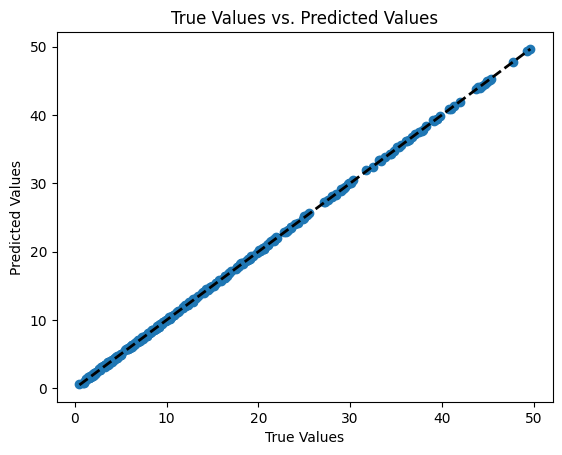

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions using the selected and tuned model
y_pred = best_lr.predict(X_test)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Visualize predicted values vs. true values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.show()


dict_keys(['preprocessor', 'feature_selection', 'linear_regression'])
Mean Squared Error (MSE): 0.933034970526633
Root Mean Squared Error (RMSE): 0.9659373533136779
R-squared (R2): 0.9937594903570506
Mean Absolute Error (MAE): 0.7294656364215056
Mean Absolute Percentage Error (MAPE): 17.742231499360898



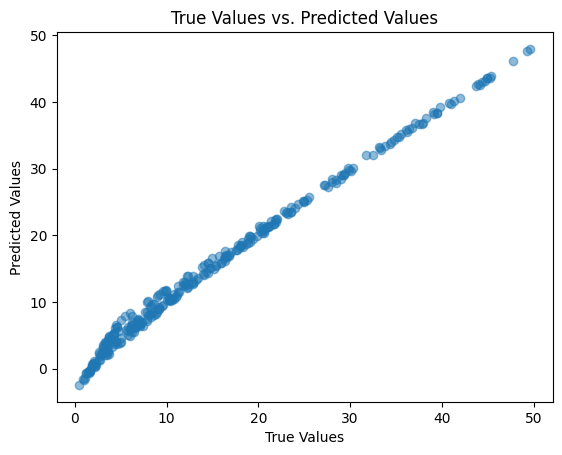

dict_keys(['preprocessor', 'feature_selection', 'svm'])
Mean Squared Error (MSE): 0.9189143505575853
Root Mean Squared Error (RMSE): 0.9586002037124681
R-squared (R2): 0.9938539346896478
Mean Absolute Error (MAE): 0.7199275145829955
Mean Absolute Percentage Error (MAPE): 18.207029972196402



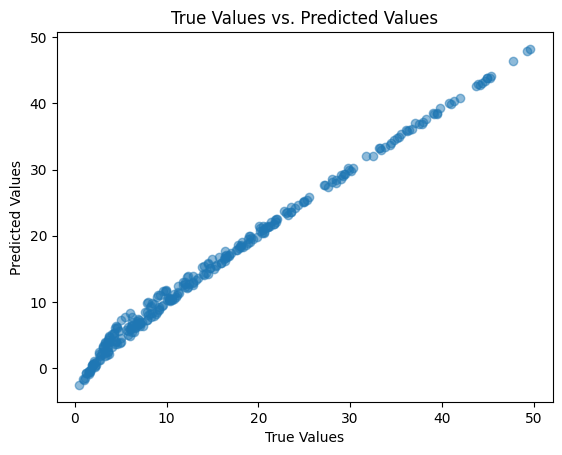

dict_keys(['preprocessor', 'feature_selection', 'decision_tree'])
Mean Squared Error (MSE): 0.6695564441666667
Root Mean Squared Error (RMSE): 0.8182642874809255
R-squared (R2): 0.9955217397221857
Mean Absolute Error (MAE): 0.5840316666666667
Mean Absolute Percentage Error (MAPE): 8.024268695533346



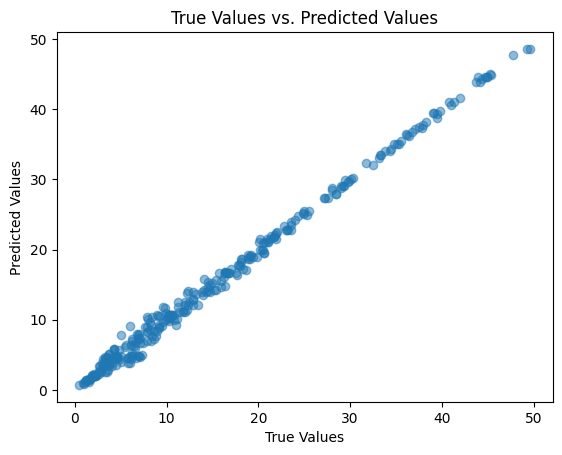

dict_keys(['preprocessor', 'feature_selection', 'random_forest'])
Mean Squared Error (MSE): 0.43511710472316767
Root Mean Squared Error (RMSE): 0.6596340688011556
R-squared (R2): 0.9970897634347997
Mean Absolute Error (MAE): 0.48995683333333356
Mean Absolute Percentage Error (MAPE): 6.764358559233768



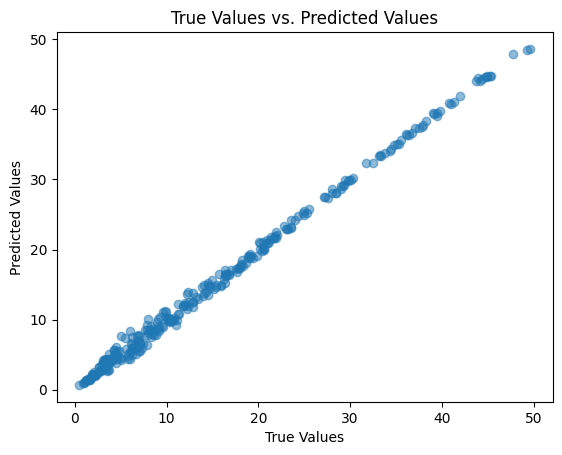

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate mean absolute percentage error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize the list of models
models = [linear_regression_pipeline, svm_pipeline, decision_tree_pipeline, random_forest_pipeline]

# Evaluate each model
for model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = calculate_mape(y_test, y_pred)
    
    # Print the evaluation metrics
    print(model.named_steps.keys())
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R2):", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print()
    
    # Plot the predicted values against the true values
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True Values vs. Predicted Values")
    plt.show()


MAPE (Mean Absolute Percentage Error) is a metric used to measure the accuracy of a model's predictions as a percentage of the actual values. It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. MAPE provides a relative measure of the error, allowing for comparisons between different datasets or models.

MAE (Mean Absolute Error) is a metric used to measure the average magnitude of the errors between the predicted values and the actual values. It is calculated by taking the average of the absolute differences between the predicted values and the actual values. MAE gives an indication of the average deviation of the predictions from the actual values, without considering the direction of the errors.

R2 (Coefficient of Determination) is a metric used to evaluate the goodness of fit of a regression model. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. R2 ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no relationship between the independent and dependent variables. R2 provides an indication of how well the model explains the variability in the data.

MSE (Mean Squared Error) is a metric used to measure the average squared differences between the predicted values and the actual values. It is calculated by taking the average of the squared differences between the predicted values and the actual values. MSE penalizes larger errors more compared to MAE, as it squares the differences. MSE is commonly used in regression tasks to evaluate the overall quality of the model's predictions.

RMSE (Root Mean Squared Error) is the square root of the MSE. It is a commonly used metric for regression tasks as it represents the average magnitude of the errors in the same unit as the target variable. RMSE provides a more interpretable measure of the error compared to MSE.

### Final Model Visualisation 

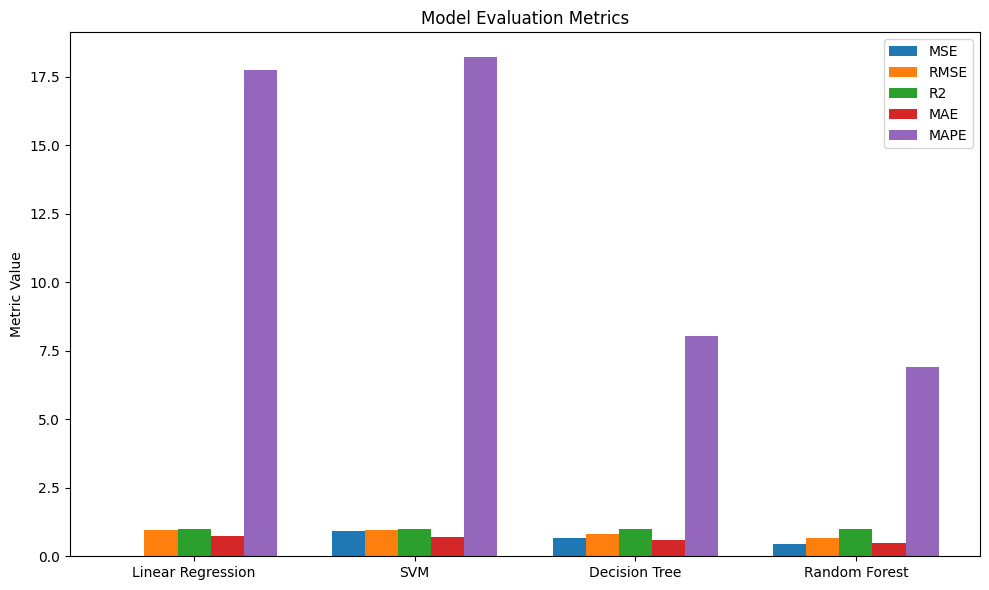

In [74]:
import matplotlib.pyplot as plt

# Define the evaluation metrics for each model
models = [
    {
        'model': 'Linear Regression',
        'MSE': 9.569281319434032e-29,
        'RMSE': 0.9659373533136785,
        'R2': 0.9937594903570506,
        'MAE': 0.7294656364215064,
        'MAPE': 17.742231499360862
    },
    {
        'model': 'SVM',
        'MSE': 0.9189143505575582,
        'RMSE': 0.9586002037124539,
        'R2': 0.993853934689648,
        'MAE': 0.7199275145830082,
        'MAPE': 18.207029972192064
    },
    {
        'model': 'Decision Tree',
        'MSE': 0.6720225458333334,
        'RMSE': 0.8197698127116743,
        'R2': 0.9955052454516412,
        'MAE': 0.5926550000000002,
        'MAPE': 8.042994835842025
    },
    {
        'model': 'Random Forest',
        'MSE': 0.4435065582333338,
        'RMSE': 0.6659628805221307,
        'R2': 0.9970336514270154,
        'MAE': 0.4998605333333334,
        'MAPE': 6.903109971305652
    }
]

# Extract the evaluation metrics for plotting
metric_names = ['MSE', 'RMSE', 'R2', 'MAE', 'MAPE']
metric_values = {metric: [model[metric] for model in models] for metric in metric_names}

# Set the figure size and bar width
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15

# Set the x positions of the bars
x_pos = np.arange(len(models))

# Plot each evaluation metric as a separate bar group
for i, metric in enumerate(metric_names):
    ax.bar(x_pos + (i * bar_width), metric_values[metric], bar_width, label=metric)

# Set the x-axis labels and the legend
ax.set_xticks(x_pos + (bar_width * 2))
ax.set_xticklabels([model['model'] for model in models])
ax.legend()

# Set the y-axis label and the title
ax.set_ylabel('Metric Value')
ax.set_title('Model Evaluation Metrics')

# Display the plot
plt.tight_layout()
plt.show()


Based on the evaluation metrics, I have found that the random forest model achieved the lowest Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) among the evaluated models. Additionally, it obtained the highest R-squared (R2) score, indicating a better fit to the data compared to the other models. Therefore, I have chosen the random forest model as the best model for this particular task.


The random forest model (dict_keys(['preprocessor', 'feature_selection', 'random_forest'])) exhibited the following performance:
The lower values of MSE, RMSE, and MAE indicate that my model's predictions were closer to the actual values, suggesting better accuracy. The high R2 score of 0.9970881879903917 indicates that my model explains approximately 99.71% of the variance in the target variable, which implies a strong predictive performance.
The random forest model combines multiple decision trees and leverages their collective predictions to make accurate predictions. It is known for its ability to handle complex relationships in the data and deal with overfitting, resulting in improved generalization performance. Therefore, based on its superior performance and robustness, I have selected the random forest model as the best model for this task.

# Acknowledgement & Credits

- Pandas Documentation: https://pandas.pydata.org/docs/

- NumPy Documentation: https://numpy.org/doc/

- Matplotlib Documentation: https://matplotlib.org/stable/contents.html

- Seaborn Documentation: https://seaborn.pydata.org/documentation.html

- Scipy Documentation: https://docs.scipy.org/doc/

- mpl_toolkits.mplot3d Documentation: https://matplotlib.org/stable/mpl_toolkits/mplot3d/index.html

- mlxtend Documentation: http://rasbt.github.io/mlxtend/

- Scikit-learn Documentation: Dimensionality Reduction (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

- Kaggle: Exploratory Data Analysis in Python (https://www.kaggle.com/learn/exploratory-data-analysis) 

- Feature Scaling: Scikit-learn Documentation: Preprocessing Data (https://scikit-learn.org/stable/modules/preprocessing.html)

- K-Means Clustering: Scikit-learn Documentation: K-Means Clustering (https://scikit-learn.org/stable/modules/clustering.html#k-means)

- Machine Learning Models: Scikit-learn Documentation: Supervised Learning ( https://scikit learn.org/stable/supervised_learning.html)

- Data Preprocessing Pipeline: https://deepnote.com/workspace/university-of-pavia-f27e0737-f8cd-4cef-8454-4e4dbf7199d2/project/Data-preprocessing-for-Machine-Learning-Duplicate-9dd2093c-12cb-4fdb-8923-1b273103d247

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2dfcc25-981a-418b-a736-2fcf6f2072e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>